In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df_skiers = pd.read_csv("../data/filtered/Dati_filtrati_all.csv")
df_skiers = df_skiers[df_skiers["DNF"] == False]

Start line for day G1 is ( 10.469379763465932 , 46.506883423514125 )
Finish line for day G1 is ( 10.472812068017284 , 46.50098302152348 )


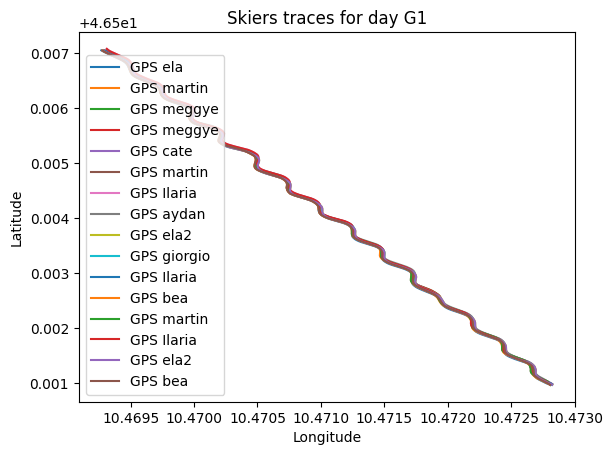

Start line for day P1 is ( 10.465237119421992 , 46.49968262086277 )
Finish line for day P1 is ( 10.471987467126947 , 46.50012935107607 )


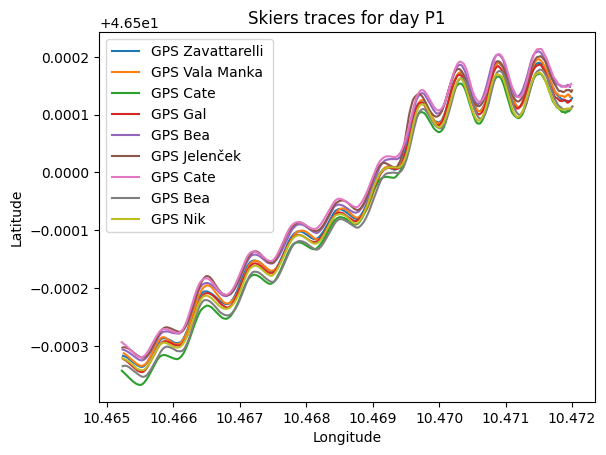

Start line for day P2 is ( 10.46528420902164 , 46.499660048685854 )
Finish line for day P2 is ( 10.471978120332247 , 46.500164109184766 )


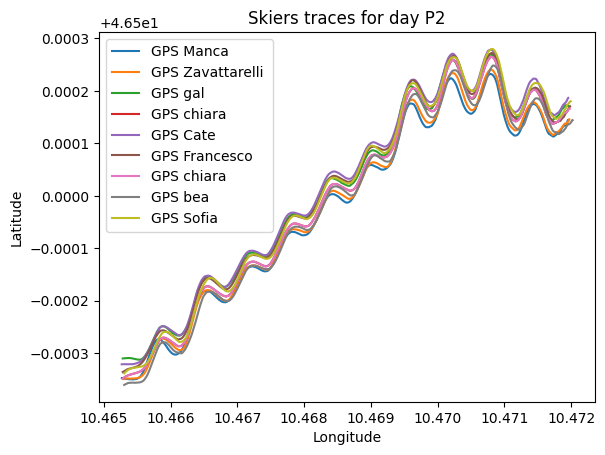

In [87]:
for day in ["G1", "P1", "P2"]:
    df_skiers_day = df_skiers[df_skiers["Day"] == day]


    longS, latS = [], []
    longE, latE = [], []

    for athlete, skier_file, startTime, duration in zip(df_skiers_day["Atleta"], df_skiers_day["File_gps"], df_skiers_day["StartTime"], df_skiers_day["Time"]):
        df_skier = pd.read_csv(skier_file)
        df_skier_started = df_skier[df_skier["Timestamp"] >= startTime]
        df_skier_run = df_skier_started[df_skier_started["Timestamp"] <= startTime + duration]
        df_skier_run = df_skier_run.sort_values('Timestamp', ascending=False)

        plt.plot(df_skier_run["GNSS_Longitude"], df_skier_run["GNSS_Latitude"], label = athlete)
        longS.append(df_skier_run["GNSS_Longitude"].to_numpy()[0])
        latS.append(df_skier_run["GNSS_Latitude"].to_numpy()[0])
        longE.append(df_skier_run["GNSS_Longitude"].to_numpy()[-1])
        latE.append(df_skier_run["GNSS_Latitude"].to_numpy()[-1])

    print("Start line for day", day, "is (", np.average(longS), ",", np.average(latS), ")")
    print("Finish line for day", day, "is (", np.average(longE), ",", np.average(latE), ")")

    plt.title(f"Skiers traces for day {day}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.savefig(f"../figures/skiers_traces_day_{day}")
    plt.show()